In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding

In [21]:
model = tf.keras.models.Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape = (28,28,1)),
    MaxPooling2D(),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(32,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.25),
    Dense(10,activation='softmax')
])

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2777 - accuracy: 0.9183 - val_loss: 0.0798 - val_accuracy: 0.9753
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0800 - accuracy: 0.9748 - val_loss: 0.0528 - val_accuracy: 0.9824
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0575 - accuracy: 0.9817 - val_loss: 0.0536 - val_accuracy: 0.9819
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0447 - val_accuracy: 0.9852
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0394 - accuracy: 0.9871 - val_loss: 0.0377 - val_accuracy: 0.9874


In [25]:
score = model.evaluate(x_test,y_test)
print('Loss = ',round(score[0],4),'\nAccuracy ',round(score[1],4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9874
Loss =  0.0377 
Accuracy  0.9874


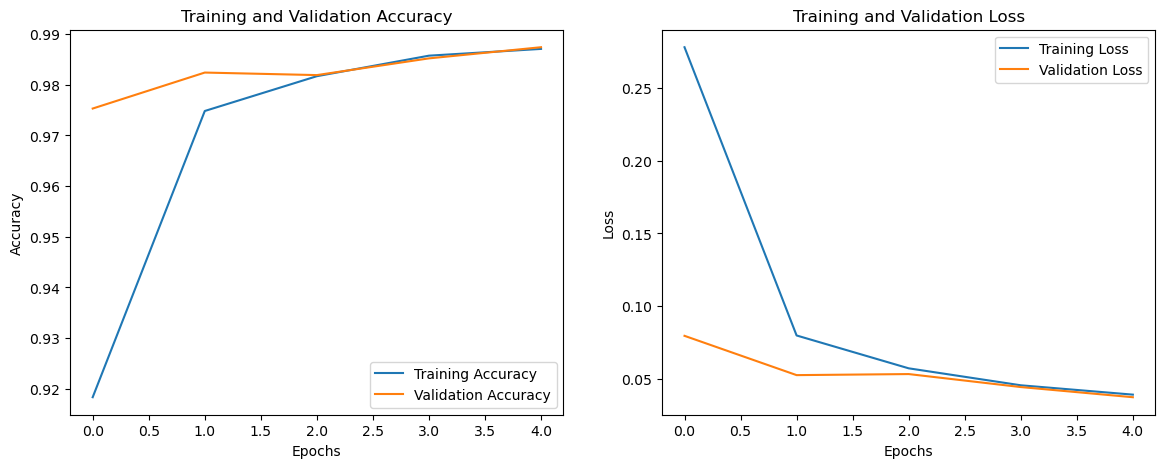

In [33]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy ')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss ')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()